# 라이브러리

In [439]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 경로 설정

In [440]:
data_path = '../data'
data_name = '/feature_choice.csv'

# 데이터 읽어 오기

In [441]:
data_set = pd.read_csv(data_path + data_name, delimiter = ',')
data_set.dropna(inplace = True)
data_set = data_set.drop(columns = ['index'])

x_data = data_set.drop(columns = ['quality'])
# x_data = data_set['alcohol']
y_data = data_set['quality']

x_data = x_data.values.tolist()
y_data = y_data.values.tolist()

# train_set 설정

In [442]:
train_size = int(len(x_data) * 0.7)

x_train = x_data[:train_size]
x_train = np.array(x_train, dtype = np.float32)

y_train = y_data[:train_size]
y_train = [i-3 for i in y_train]
y_train = np.array(y_train, dtype = np.int32)
y_train = y_train.reshape([-1,1])

# test_set 설정

In [443]:
x_test = x_data[train_size:]
x_test = np.array(x_test, dtype = np.float32)

y_test = y_data[train_size:]
y_test = [i-3 for i in y_test]
y_test = np.array(y_test, dtype = np.int32)
y_test = y_test.reshape([-1,1])

# 하이퍼파라미터설정

In [444]:
class_dict = {}

for i in y_train:
    class_dict[i[0]] = 1

In [445]:
x_de = len(x_train[0])
classes = len(class_dict)
learning_rate = 0.01

# 로지스틱 설정

# 1 layer

In [446]:
x = tf.placeholder(tf.float32, shape = [None, x_de])
y = tf.placeholder(tf.int32, shape = [None, 1])
r = tf.placeholder(tf.float32)

y_one_hot = tf.one_hot(y, classes)
y_one_hot = tf.reshape(y_one_hot, [-1,classes])

W = tf.Variable(tf.random_normal([x_de, 224]))
b = tf.Variable(tf.random_normal([224]))

logits = tf.matmul(x,W) + b

L1 = tf.nn.relu(logits)
L1 = tf.nn.dropout(L1, keep_prob = r)

# 2 layer

In [447]:
W_2 = tf.Variable(tf.random_normal([224, 112]))
b_2 = tf.Variable(tf.random_normal([112]))

logits_2 = tf.matmul(L1,W_2) + b_2

L2 = tf.nn.relu(logits_2)
L2 = tf.nn.dropout(L2, keep_prob = r)

# 3 layer

In [448]:
W_3 = tf.Variable(tf.random_normal([112, 56]))
b_3 = tf.Variable(tf.random_normal([56]))

logits_3 = tf.matmul(L2,W_3) + b_3

L3 = tf.nn.relu(logits_3)
L3 = tf.nn.dropout(L3, keep_prob = r)

# 4 layer

In [449]:
W_4 = tf.Variable(tf.random_normal([56, 28]))
b_4 = tf.Variable(tf.random_normal([28]))

logits_4 = tf.matmul(L3,W_4) + b_4

L4 = tf.nn.relu(logits_4)
L4 = tf.nn.dropout(L4, keep_prob = r)

# 5 layer

In [450]:
W_5 = tf.Variable(tf.random_normal([28, 14]))
b_5 = tf.Variable(tf.random_normal([14]))

logits_5 = tf.matmul(L4,W_5) + b_5

L5 = tf.nn.softmax(logits_5)
L5 = tf.nn.dropout(L5, keep_prob = r)

# 6 layer

In [451]:
W_6 = tf.Variable(tf.random_normal([14, classes]))
b_6 = tf.Variable(tf.random_normal([classes]))

logits_6 = tf.matmul(L5,W_6) + b_6

L6 = tf.nn.softmax(logits_6)
L6 = tf.nn.dropout(L6, keep_prob = r)

# output layer

In [452]:
cost = tf.nn.softmax_cross_entropy_with_logits(logits = logits_6, labels = y_one_hot)
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

predict = tf.argmax(L6,1)
acc = tf.reduce_mean(tf.cast(tf.equal(predict, tf.argmax(y_one_hot, 1)), dtype = tf.float32))

# 돌리기

In [456]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    cost_x = []
    cost_y = []
    
    for step in range(2001):
        temp = 0
        c, _ = sess.run([cost, train], feed_dict = {x : x_train, y : y_train, r : 0.7})
        
        cost_x.append(step)
        
        for i in c:
            temp += i
        cost_y.append(temp/float(x_de))
        
        if(step % 100 == 0):
            print("Step : {}, cost : {}".format(step,c))
        
    for step in range(2001):
        ac = sess.run([acc], feed_dict = {x : x_test, y : y_test, r : 1.0})
        
    print("Accuracy : {}%".format(ac[0] * 100))

Step : 0, cost : [4.588522  4.3703465 2.5619369 ... 4.588522  4.588522  2.5619369]
Step : 100, cost : [0.8428819  1.3784714  0.63146347 ... 1.3784714  0.8205198  0.8428819 ]
Step : 200, cost : [0.8265702  0.8260746  1.0551356  ... 0.80179554 0.8260746  0.8265703 ]
Step : 300, cost : [0.8301914 0.8301914 0.8301914 ... 0.9376214 0.8034632 0.8031665]
Step : 400, cost : [0.8965322 0.8156095 0.8154482 ... 0.8965322 0.8965322 0.8965322]
Step : 500, cost : [0.88183826 0.82268065 0.8228035  ... 0.82268065 0.8228035  0.8228035 ]
Step : 600, cost : [0.82355547 0.8693712  0.8383862  ... 0.821668   0.821668   0.8693712 ]
Step : 700, cost : [0.8608768 0.8608768 0.8608768 ... 0.8608768 0.8608768 0.8608768]
Step : 800, cost : [0.7996058 0.7996058 0.8509909 ... 0.7996058 0.7996058 0.7996058]
Step : 900, cost : [0.8459569 0.8277771 1.577848  ... 0.8166899 0.8459569 0.8459569]
Step : 1000, cost : [0.81459016 0.81459016 0.8302431  ... 0.81459016 0.81459016 0.81459016]
Step : 1100, cost : [0.8231758 0.796

# 그래프 그리기

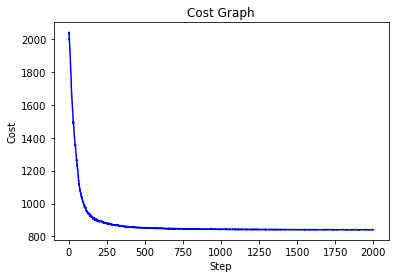

In [457]:
plt.plot(cost_x, cost_y, 'b-')
plt.title("Cost Graph")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show()